기계학습종류들  
1. 지도학습 : 
    * 회귀 : 값을 추측  
    * 분류 : classification  
    * 랭킹 : 추천시스템 (분류의 일종임)

2. 비지도학습 :
    * 차원축소 : PGA
    * 군집화 : clustering

ML의 목표
> Data로부터  
> Specific 문제 해결을 위한  
> 최적의 모델 만들기  

최적이란, 일반적인 경우에도 적용 가능한 것을 의미한다.

cross validation쓰는경우  
1. 데이터 적을 떄 성능평가
2. 알고리즘찾고 hyper param 찾을 때

# validation curve

In [3]:
import seaborn as sns

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.species = iris.species.map({'setosa':0, 'versicolor':1,'virginica':2})

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
from sklearn.model_selection import learning_curve, validation_curve

In [10]:
learning_curve(iris.iloc[:,:-1], iris.iloc[:,-1])
# 학습 데이터의 양에 따라서 변하는 정확도를 나타내는 그래프

TypeError: learning_curve() missing 1 required positional argument: 'y'

``` python
validation_curve()
```
parameter값에 따라서 변하는 성능 파악하기 위한 그래프 그리기

데이터 쪼갤 때 hold-out 방식  
kaggle에서는 train데이터만 줌.. 따라서 hyper parameter 평가해줄려면 validation data가 필요하다  
scikit에서는 holdout을 지원 안해줘서 2번 train-test-split을 써야 한다.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
train_scores, test_scores = validation_curve(KNeighborsClassifier(), iris.iloc[:,:-1], \
                 iris.iloc[:,-1], 'n_neighbors', [3,4,5,6,7], cv=10)
# hyper parameter 범위랑 이름..

In [16]:
validation_curve(KNeighborsClassifier(), iris.iloc[:,:-1], 
                 iris.iloc[:,-1], 'n_neighbors', [3,4,5,6,7], cv=10)
# 눈으로 보기 힘드니 그래프로 그리자  from sklearn_evaluation import plot

(array([[0.95555556, 0.96296296, 0.95555556, 0.96296296, 0.97777778,
         0.95555556, 0.97037037, 0.95555556, 0.95555556, 0.95555556],
        [0.95555556, 0.96296296, 0.95555556, 0.96296296, 0.97777778,
         0.96296296, 0.97037037, 0.96296296, 0.95555556, 0.97037037],
        [0.96296296, 0.97037037, 0.96296296, 0.97037037, 0.98518519,
         0.96296296, 0.97777778, 0.96296296, 0.96296296, 0.97037037],
        [0.97037037, 0.97037037, 0.97037037, 0.97777778, 0.98518519,
         0.95555556, 0.98518519, 0.97037037, 0.97037037, 0.97037037],
        [0.96296296, 0.97777778, 0.97037037, 0.97037037, 0.98518519,
         0.97037037, 0.97777778, 0.97037037, 0.97037037, 0.97777778]]),
 array([[1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
         1.        , 0.93333333, 1.        , 1.        , 1.        ],
        [1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
         1.        , 0.93333333, 1.        , 1.        , 1.        ],
        [1.        , 0.93

In [18]:
from sklearn_evaluation import plot

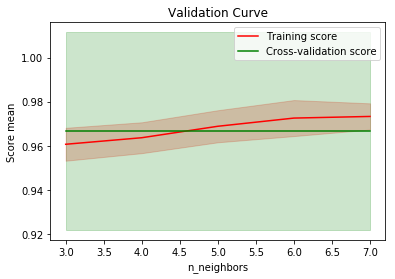

In [19]:
plot.validation_curve(train_scores, test_scores, [3,4,5,6,7], 'n_neighbors')
# hyper parameter 값의 변화에 따라서 변하는 성능을 나타내는 그래프
# test score(cross validation score와 유사하다고 생각하자)높이는 것이 목적!

train score가 일반적으로 높다.  
근데, 3,4,5에서 cv-score가 더 높다. 3,4,5에서 학습이 잘 안되었음을 보여준다. 3,4,5를 선택하면 안된다. 6과 7을 선택하자  
3,4,5에서 overfitting이 일어날 가능성이 있다.  
overfitting은 모델이 복잡해서 일어난다..!  

In [22]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), \
                                                        iris.iloc[:,:-1], iris.iloc[:,-1], cv=10)

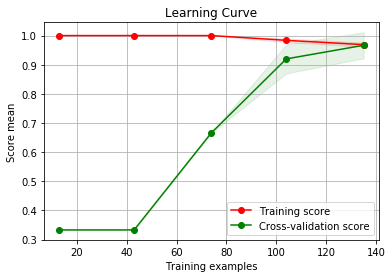

In [23]:
plot.learning_curve(train_scores, test_scores, train_sizes)

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
train_scores, test_scores = validation_curve(LogisticRegression(), iris.iloc[:,:-1], \
                 iris.iloc[:,-1], 'C', [1.0,2.0,3.0,4.0,5.0], cv=10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


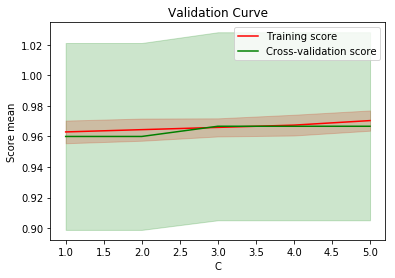

In [28]:
plot.validation_curve(train_scores, test_scores, [1.0,2.0,3.0,4.0,5.0], 'C')
# 2쯤 선택하는게 안정적이다. 정확도가 계속 올라간다고 좋은게 아니야..!
# 3에서 training score보다 cv-score가 높다. == overfitting이 일어날 가능성이 있다.
# training score : train data에서 train data로 검증함
# cv score : validation data로 검증

# pipeline과 gridCV같이 쓰면 overfitting확인이 불가능하다...!  
즉, hyper parameter가 적절한지 확인을 못한다.  
따라서 overfitting일어났는지 확인하기 위해서 validation_curve를 사용

data가 작아서 어쩔 수 없이 cross validation사용함  
hold out을 못 했음 ㄸㄹㄹ  

# 최종 모델은 어떻게 만들지??
원래 데이터에서 모델을 만든다.

train test split 가정 : test data가 정답이라는 가정  
따라서 clustering해서 labeling하면 오류가 많이 생긴다. clustering은 target data가 없을 때 어쩔 수 없이 쓰는 기법이다...!

# 상속 & duck typing으로 나만의 알고리즘 만들 수 있다.

``` python
class MyEstimator:
    def __init__(self):
        print('a')
        
    def fit(self, X, y):
        print('b')
```
# duck typing으로 알고리즘 만드는 방법

``` python
class MyEstimator(BaseEstimator):  
    def __init__(self):
        print('a')
        
    def fit(self, X, y):
        print('b')
```
#### fit, predict, score만 없어서 내가 만들어야 한다. 나머지 BaseEstimator가 기능을 제공해줌
# 상속으로 구현하는 방법 : 기존에 있던거 가져다가 쓸 수 있음 

새로 알고리즘을 구현했을 때, DummyClassifier보다는 성능이 좋아야 한다.(비교군)

In [31]:
def a(*b):
    return b

In [32]:
a(1,2,3,4,5)

(1, 2, 3, 4, 5)

In [34]:
a([1,2,3,4,5])
# 5개의 원소로 인식시키고 싶은데...!

([1, 2, 3, 4, 5],)

In [35]:
a(*[1,2,3,4,5])
# 요렇게...!

(1, 2, 3, 4, 5)

# [hold-out vs cv](https://stats.stackexchange.com/questions/104713/hold-out-validation-vs-cross-validation)

kaggle에서는 train dataset과 test dataset을 분리해서 우리에게 train dataset만 준다.

결국 learning curve는 어떻게 해석하는게 좋을까...? 시험 끝나고 공부해보자

hold-out validation이 무엇인가 조사해보기  
How much training data do we need?  